['GTV-1', 'Spinal-Cord', 'Lung-Left', 'Lung-Right']
(134, 512, 512)
(512, 512, 134)


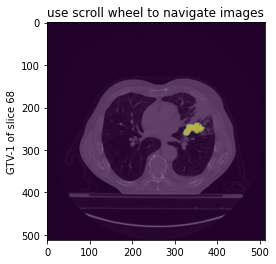

In [2]:
"""
Importing relevant libraries
"""
import rt_utils
import sys
import numpy as np
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
import SimpleITK as sitk

""" 
The below loads existing RT Struct. Requires the series path and existing RT Struct path 
"""
rtstruct = RTStructBuilder.create_from(
  dicom_series_path="/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/-CT", 
  rt_struct_path="/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/RTSTRUCT/3-2.dcm"
)

""" 
The below prints all of the ROI names from the image metadata
"""
print(rtstruct.get_roi_names())

""" The below loads the 3D Mask, for the chosen ROI,
from the RT Struct file. By changing the sum for mask_3d the user can choose
which ROI are masked. """
mask_3d_Lung_Right = rtstruct.get_roi_mask_by_name("Lung-Right") 
mask_3d_Lung_Left = rtstruct.get_roi_mask_by_name("Lung-Left")
mask_3d_GTV_1 = rtstruct.get_roi_mask_by_name("GTV-1")
mask_3d_spinal_cord = rtstruct.get_roi_mask_by_name("Spinal-Cord")
mask_3d = mask_3d_GTV_1
"""mask_3d_Lung_Right + mask_3d_Lung_Left +"""  """+mask_3d_spinal_cord"""

""" The below produces an array with the length of the number of slices
in the DICOM series. This will be used when we label the axes of the plot. """
numbers = np.arange(mask_3d.shape[2])
slice_numbers = numbers + 1

"""
The code gelow produces a matplotlib plot of the mask slices which
can be 'scrolled' through using the mouse scroll wheel. 
NOTE: this does not work in a Jupyter notebook and must be run in a pop up for
it to work. I need to see if I can fix this.
"""

class IndexTracker:
    def __init__(self, ax, X, volume):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.volume = sitk.GetArrayFromImage(volume) #can hash out to just see mask
        #print(self.volume.shape) #can hash out to just see mask
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.vol = ax.imshow(self.volume[self.ind], cmap = 'gray') #can hash out to just see mask
        self.im = ax.imshow(self.X[:, :, self.ind], alpha = 0.5)
        
        self.update()

        

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.vol.set_data(self.volume[self.ind]) #can hash out to just see mask
        self.im.set_data(self.X[:, :, self.ind])
        
        self.ax.set_ylabel('GTV-1 of slice %s' % (self.ind + 1))
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

mask_3d = mask_3d + 1
mask_3d = mask_3d - 1
X = sitk.GetImageFromArray(mask_3d)
print(X.GetSize())
X = sitk.GetArrayFromImage(X)

reader = sitk.ImageSeriesReader() #can hash out to just see mask
dcm_paths = reader.GetGDCMSeriesFileNames('/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/-CT') #can hash out to just see mask
reader.SetFileNames(dcm_paths) #can hash out to just see mask
volume = reader.Execute() #can hash out to just see mask
print(volume.GetSize())
tracker = IndexTracker(ax, mask_3d, volume)

fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()


(134, 512, 512)
(512, 512, 134)
(134, 512, 512)
(512, 512, 134)
(512, 512, 134)


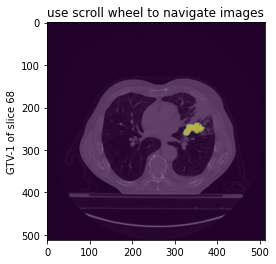

In [7]:
X = sitk.GetImageFromArray(X)
print(X.GetSize())
X = sitk.GetArrayFromImage(X)
print(X.shape)
X = sitk.GetImageFromArray(X)
print(X.GetSize())
X = sitk.GetArrayFromImage(X)
print(X.shape)

fig, ax = plt.subplots(1, 1)

reader = sitk.ImageSeriesReader() #can hash out to just see mask
dcm_paths = reader.GetGDCMSeriesFileNames('/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/-CT') #can hash out to just see mask
reader.SetFileNames(dcm_paths) #can hash out to just see mask
volume = reader.Execute() #can hash out to just see mask
print(volume.GetSize())
tracker = IndexTracker(ax, mask_3d, volume)

fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()